# Task 1.1 Data Preparation

## Summary 
In this section I have:
- **Loaded** the dataset as a dataframe using pandas
- Checked for and dropped **duplicates**
- Checked for **missing values**
- **Normalised** the dataset using MinMaxScaler
- Plotted columns before and after normalisation to ensure the values fall within the range 0-1 while maintaining the original shape

**Note:** Although the dataset is small, I decided to check for duplicates and missing values for fun and as part of best practice. I understand that addressing these issues in a dataset this small is unlikely to impact the quality of the model *greatly*.
- I found 1 duplicate row and no missing values. 

The dataset was successfully normalised as we can see in the **"After Normalisation"** graph:
- The range is now 0-1
- The shape is the same as the original plot (before normalisation)
  - This tells us that normalisation has been successful and the data was not distorted or altered by mistake in the process


In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

**Loading the Dataset**

In [9]:
data = pd.read_csv("glass_dataset.csv") #load dataset
print(data.head(5), "\n") #print first 5 rows to verify

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1 



**Checking for Duplicates and Missing Values**

In [17]:
print("Duplicate count : ",data.duplicated().sum(), "\n") #print number of duplicates
print("Duplicate rows: \n", data[data.duplicated(keep=False)], "\n") #print present duplicate rows
data = data.drop_duplicates() #drop duplicates from our set
print("Duplicate count after drop : ",data.duplicated().sum(), "\n") #print number of duplicates to verify

print("Missing count: ",data.isnull().sum().sum(), "\n") #calculate and print total sum of missing values

Duplicate count :  1 

Duplicate rows: 
          RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
38  1.52213  14.21  3.82  0.47  71.77  0.11  9.57  0.0  0.0     1
39  1.52213  14.21  3.82  0.47  71.77  0.11  9.57  0.0  0.0     1 

Duplicate count after drop :  0 

Missing count:  0 



**Normalising the Dataset**

Before scaling RI       0.02278
Na       6.65000
Mg       4.49000
Al       3.21000
Si       5.60000
K        6.21000
Ca      10.76000
Ba       3.15000
Fe       0.51000
Type     6.00000
dtype: float64 



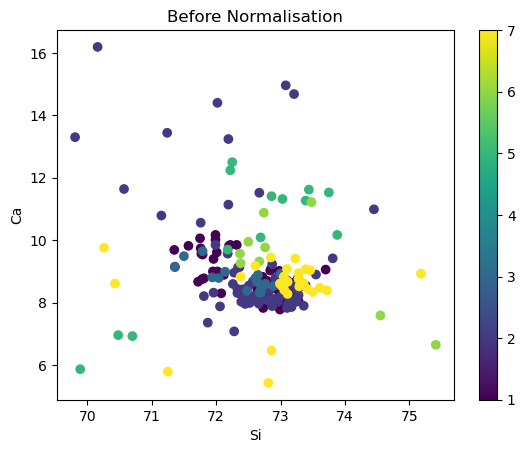

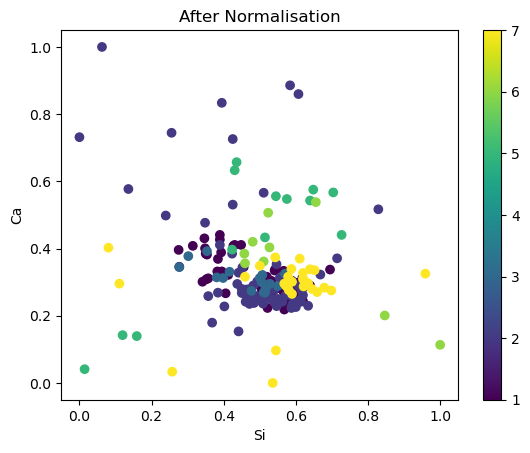

After scaling RI      1.0
Na      1.0
Mg      1.0
Al      1.0
Si      1.0
K       1.0
Ca      1.0
Ba      1.0
Fe      1.0
Type    6.0
dtype: float64


In [22]:
print("Before scaling", data.max() - data.min(), "\n") #print the range before scaling
inputs = data.drop(columns=["Type"]) #separate the inputs (glass features) from the targets (glass types) 
targets = data["Type"]  

#pick 2 columns to investigate normalisation effects with 
input_1 = "Si"
input_2 = "Ca"

# plot columns Si and Ca before normalisation with a scatter graph
plt.scatter(inputs[input_1] ,inputs[input_2],c = targets , cmap = "viridis" )
plt.colorbar()
plt.title("Before Normalisation")
plt.xlabel(input_1)
plt.ylabel(input_2)
plt.show()

scaler = MinMaxScaler()
scaled = scaler.fit_transform(inputs)
data = pd.DataFrame(scaled, columns=inputs.columns)
data["Type"] = targets.reset_index(drop=True)

# plot columns Si and Ca after normalisation with a scatter graph
plt.scatter(data[input_1], data[input_2], c=data["Type"], cmap="viridis")
plt.colorbar()
plt.title("After Normalisation")
plt.xlabel(input_1)
plt.ylabel(input_2)
plt.show()

#reassign inputs and targets after normalisation to be used in test train split 
inputs = data.drop(columns=["Type"])
targets = data["Type"]

print("After scaling", data.max() - data.min()) #print the range after scaling to further verify success 

# Task 1.2 Classification

In this section I have: 
- Split the normalised dataset into 4 parts using a **random seed** for reproducibility
  - X_train to train the model on inputs (glass features)
  - X_test to test the model on **unseen** inputs (glass features)
  - y_train to train the model on targets (types of glass)
  - y_test to test the model on targets (types of glass)

### **KNN**
- Used a loop to train a KNN Classifier with neighours ranging 1,20
- Plotted the accuracy score of each KNN(n) to assess the best model
- Predicted points using the best model we found, plotted the results using a confusion matrix

### **SVM**
- Used a loop to train a SVM Classifer with Kernel Shapes (Linear, Polynomial, Radial)
- Plotted the acuracy score of each SVM with different kernel shapes
- Predicted points using the best SVM model we found, plotted the results using a confusion matrix

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

**Split Dataset into Testing and Training Sets**

In [33]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, stratify=targets, random_state=42)

**Investigating the Optimal Number of Neighbours for KNN**

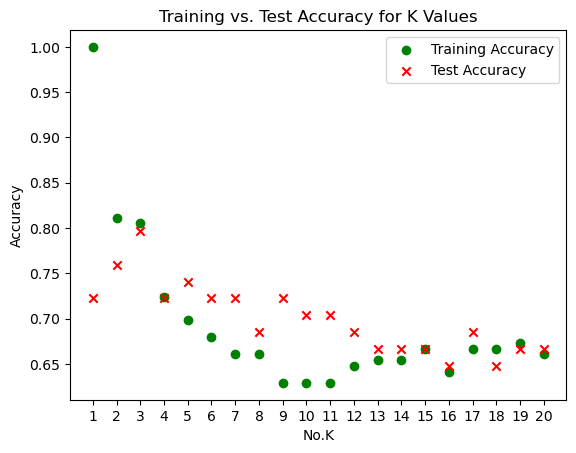

Best scoring K value: 3 with a test accuracy of 0.796

k=3 Training Accuracy: 0.805
k=3 Test Accuracy: 0.796


In [45]:
k_values = range(1, 21) 
k_train_score = [] 
k_test_score = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train) #fit the model with the training data
    
    #calculate the model accuracy score on the training data, then on the unseen test data
    k_train_score.append(knn.score(X_train, y_train)) 
    k_test_score.append(knn.score(X_test, y_test)) 

best_k_test_score = max(k_test_score) #get the highest score on test sets 
best_k_value = k_values[k_test_score.index(best_k_test_score)] #get the k that scored the highest value


plt.figure()
plt.xlabel('No.K')
plt.ylabel('Accuracy')
plt.title("Training vs. Test Accuracy for K Values")
plt.scatter(k_values, k_train_score, color= 'green', label= "Training Accuracy")
plt.scatter(k_values, k_test_score, color ='red', label = "Test Accuracy", marker = "x")
plt.xticks(k_values)
plt.legend()
plt.show()
print(f"Best scoring K value: {best_k_value} with a test accuracy of {best_k_test_score:.3f}\n")
print(f"k=3 Training Accuracy: {k_train_score[2]:.3f}")
print(f"k=3 Test Accuracy: {k_test_score[2]:.3f}")


### **Best KNN Discussion** 

##### **A Misleading K=1**
---

The highest *training* accuracy was achieved at **k=1 with a 1.00 score**, however this perfect score is due to there only being one neighbour meaning **each data point predicts itself** as it is the nearest and only existing neighbour. We can see this reflected in the **test score**, which significantly dropped since the model can no longer use itself as the nearest neighbour, and instead relies on new unseen points, something it has no prior experience with due to the model previously relying on itself to make predictions instead of learning / recognising patterns.

##### **K=3, The True Optimal Number of Neighbours**
---

The **best performance overall was achieved at k=3**. It achieved a training accuracy of 0.80 and a test accuracy only slightly lower at 0.79. With k=3, the model seems to be **generalising well** since the test score is only slightly lower than the training score, meaning the model is seemingly adapting well to new unseen data. Due to it yielding the best test score and ability to generalise I will **carry this model forward** to Task 1.3.

##### **K=3 Onwards**
---

Beyond k=3 we start to see the accuracy scores for *both* training and test data lower quite significantly, this is likely due to **underfitting** as the KNN model relies on nearest neighbours to make predictions, the more neighbours it has the broader the group of data points the model attempts to consider resulting in an overly "cautious" model - a concept we can simplify by saying the model considers a wide range of variables and selects the "safest" choice, or the average. We can see this happening as it is **performing poorly on both sets** of data as the k value increases. 



### **Investigating the Optimal Kernel Shape for SVM**

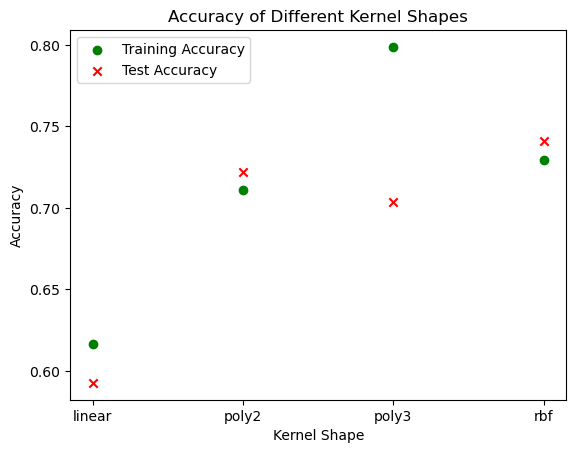

In [90]:
#evaluate optimal kernel shape for svm with train and test score 
s_train_score = []
s_test_score = []
kernel_shape =['linear', 'poly', 'rbf']
for s in kernel_shape:
    if s == 'poly': #if kernel shape is polynomial then limit search to degree 2,3
         for degree in [2,3]:
             svm = SVC(kernel=s, degree=degree)
             svm.fit(X_train, y_train)
             s_train_score.append(svm.score(X_train, y_train))
             s_test_score.append(svm.score(X_test, y_test))
             #print(f"Shape: {s}, degree {degree}, Train Accuracy: {s_train_score[-1]:.4f}, Test Accuracy: {s_test_score[-1]:.4f}")
    else:
        svm = SVC(kernel=s)
        svm.fit(X_train, y_train)
        s_train_score.append(svm.score(X_train, y_train))
        s_test_score.append(svm.score(X_test, y_test))
        #print(f"Shape: {s}, Train Accuracy: {s_train_score[-1]:.4f}, Test Accuracy: {s_test_score[-1]:.4f}")


# plot score performance for each kernel shape (linear, poly degree 2, poly degree 3, radial)
kernels = ['linear', 'poly2', 'poly3', 'rbf']
plt.figure()
plt.xlabel ("Kernel Shape")
plt.ylabel ("Accuracy")
plt.title("Accuracy of Different Kernel Shapes")
plt.scatter(kernels, s_train_score, color='green', label="Training Accuracy")
plt.scatter(kernels, s_test_score, color='red', label="Test Accuracy", marker= "x")
plt.legend()
plt.show()

#### **Best SVM Discussion** 

Return to this section !!

#### **Predicting Points with the Best KNN Model (K=3)**

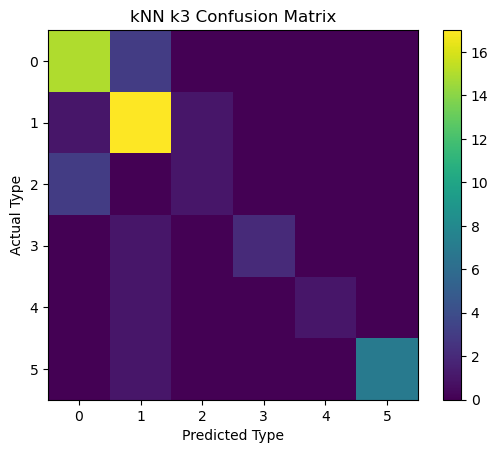

In [105]:
#demonstrate knn can predict points (using our best k value) 
knn = KNeighborsClassifier(n_neighbors=best_k_value)  
knn.fit(X_train, y_train)
classifications = knn.predict (X_test)

knn_confusion = confusion_matrix (y_test, classifications)
plt.imshow(knn_confusion)
plt.colorbar()
plt.xlabel("Predicted Type")
plt.ylabel("Actual Type")
plt.title(f"kNN k{best_k_value} Confusion Matrix")
plt.show()


#### **KNN Prediction Discussion**